# Classification

In [ ]:
# Import packages
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
url = 'https://raw.githubusercontent.com/Rising-Stars-by-Sunshine/STATS201_Aida/main/data/owid-energy-data.csv'
df = pd.read_csv(url)

In [ ]:
df.head()

,country,year,iso_code,population,gdp,biofuel_cons_change_pct,biofuel_cons_change_twh,biofuel_cons_per_capita,biofuel_consumption,biofuel_elec_per_capita,...,solar_share_elec,solar_share_energy,wind_cons_change_pct,wind_cons_change_twh,wind_consumption,wind_elec_per_capita,wind_electricity,wind_energy_per_capita,wind_share_elec,wind_share_energy
0,ASEAN (Ember),2000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN
1,ASEAN (Ember),2001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN
2,ASEAN (Ember),2002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN
3,ASEAN (Ember),2003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN
4,ASEAN (Ember),2004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN


In [ ]:
# Define criteria for energy efficiency levels
threshold_high_renewable = 8.925 # Cited source
threshold_low_intensity = 0.44  # Cited source

# Create the dependent variable based on the criteria
df['Energy_Efficiency_Level'] = 1  # Default to Medium
df.loc[(df['renewables_share_elec'] > threshold_high_renewable) & (df['energy_per_gdp'] < threshold_low_intensity), 'Energy_Efficiency_Level'] = 2 #high
df.loc[(df['renewables_share_elec'] <= threshold_high_renewable) & (df['energy_per_gdp'] >= threshold_low_intensity), 'Energy_Efficiency_Level'] = 0 #low

# Explore the distribution of the created variable
print(df['Energy_Efficiency_Level'].value_counts())

1    19973
0     1430
2      187
Name: Energy_Efficiency_Level, dtype: int64


In [ ]:
df.head()

,country,year,iso_code,population,gdp,biofuel_cons_change_pct,biofuel_cons_change_twh,biofuel_cons_per_capita,biofuel_consumption,biofuel_elec_per_capita,...,solar_share_energy,wind_cons_change_pct,wind_cons_change_twh,wind_consumption,wind_elec_per_capita,wind_electricity,wind_energy_per_capita,wind_share_elec,wind_share_energy,Energy_Efficiency_Level
0,ASEAN (Ember),2000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,1
1,ASEAN (Ember),2001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,1
2,ASEAN (Ember),2002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,1
3,ASEAN (Ember),2003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,1
4,ASEAN (Ember),2004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,1


In [ ]:
from sklearn.model_selection import train_test_split
# Separate features (X) and target variable (y)
X = df[['renewables_share_elec', 'energy_per_gdp']]
y = df['Energy_Efficiency_Level']

# Handle missing values in X
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)
X = pd.DataFrame(X_imputed, columns=X.columns)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create dataframes for training and testing sets
train_df = pd.concat([X_train, y_train], axis=1)
test_df = pd.concat([X_test, y_test], axis=1)

# Save the dataframes to CSV files
train_df.to_csv('Classification_Train.csv', index=False)
test_df.to_csv('Classification_Test.csv', index=False)

In [ ]:
mdl = RandomForestClassifier(n_estimators=100, random_state=42)
mdl.fit(X_train, y_train)
# Make predictions on the test set
y_pred = mdl.predict(X_test)
print(y_pred)

[1 1 1 ... 1 1 0]


In [ ]:
print(accuracy_score(y_test, y_pred))

0.9997684113015285


In [ ]:
confusion_matrix(y_test, y_pred)

array([[ 290,    1,    0],
       [   0, 3982,    0],
       [   0,    0,   45]])

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       291
           1       1.00      1.00      1.00      3982
           2       1.00      1.00      1.00        45

    accuracy                           1.00      4318
   macro avg       1.00      1.00      1.00      4318
weighted avg       1.00      1.00      1.00      4318



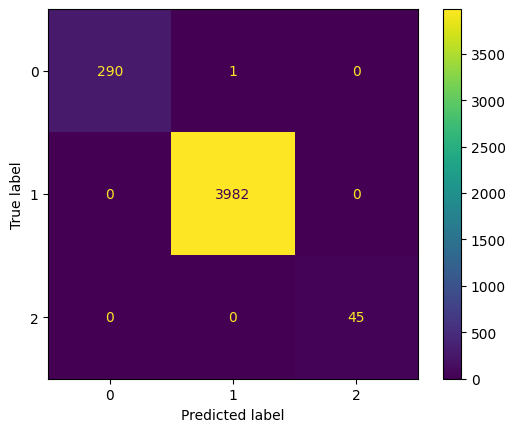

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

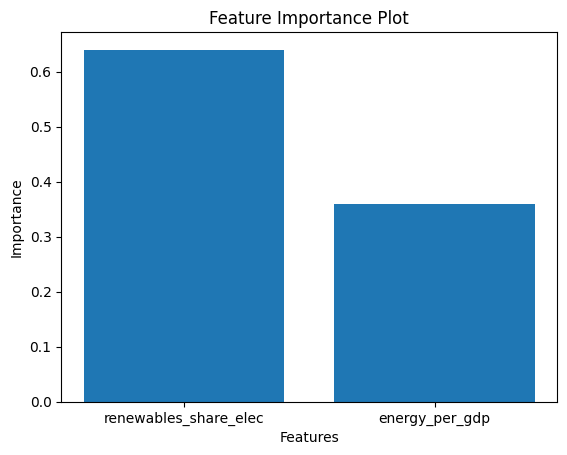

In [ ]:
# Get feature importances
feature_importances = mdl.feature_importances_

# Create a bar chart for feature importance
features = X.columns
plt.bar(features, feature_importances)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance Plot')
plt.show()